# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [ ]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = []
        current_mol.append(float(row['Cs']))
        current_mol.append(float(row['FA']))
        current_mol.append(float(row['Cl']))
        current_mol.append(float(row['Br']))
        current_mol.append(float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)
all_molecules=np.array(all_molecules)

num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[:4] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[4] for x in all_molecules[:num_train]]

x_test = [x[:4] for x in all_molecules[num_train:]]
y_test = [x[4] for x in all_molecules[num_train:]]




In [ ]:
x_train=np.array(x_train)
y_train = np.reshape(y_train, (len(y_train),1))
x_train_new = np.hstack((np.ones((x_train.shape[0],1)), x_train))

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

The equation for linear regression having four independent variables is:

y = A + B1.x1 + B2.x2 + B3.x3 + B4.x4 

Using gradient descent method, and x_train and y_train as our train dataset, we calculate the weight of the parameters B1, B2, B3, & B4.

While testing, we'll calculate the values of y using the values of x_test, and compare it with the values of y_test.

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [ ]:
def h(x,theta):
	return np.matmul(x, theta)

def cost_function(x, y, theta):
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
	m = x.shape[0]
	J_all = []
	
	for _ in range(num_epochs):
		h_x = h(x, theta)
		cost_ = (1/m)*(x.T@(h_x - y))
		theta = theta - (learning_rate)*cost_
		J_all.append(cost_function(x, y, theta))

	return theta, J_all 


theta = np.zeros((x_train_new.shape[1], 1))
learning_rate = 1
num_epochs = 50
theta, J_all = gradient_descent(x_train_new, y_train, theta, learning_rate, num_epochs)
J = cost_function(x_train_new, y_train, theta)
print("Cost: ", J)
print("Parameters: ", theta)

Cost:  [[0.00303505]]
Parameters:  [[ 1.65204628]
 [-0.04671498]
 [-0.17112292]
 [ 1.44061615]
 [ 0.60430709]]


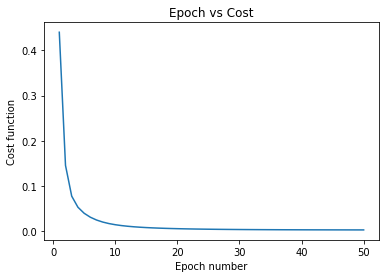

In [ ]:
x = np.array(range(1,num_epochs+1))

J_al=np.array(J_all)
y = J_al[:,0]
 
plt.plot(x, y)
plt.xlabel('Epoch number')
plt.ylabel('Cost function')
plt.title('Epoch vs Cost')
plt.show()

2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

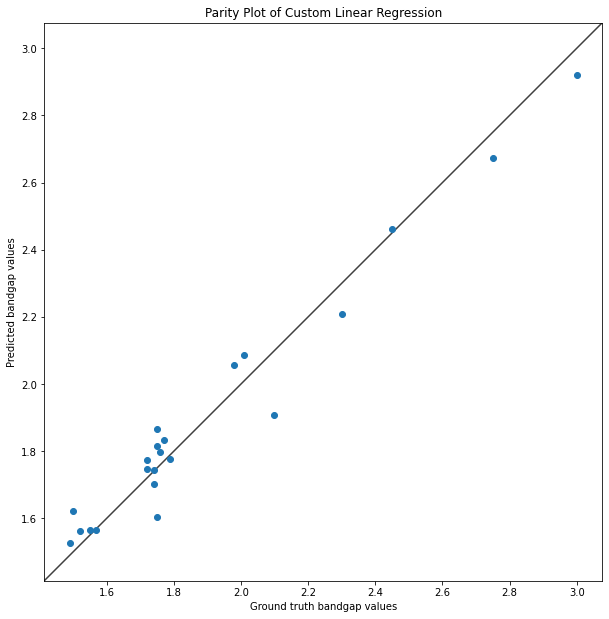

In [ ]:
# Get the predictions of x_test into `y_pred`
y_pred=[]
def test(theta, x_test):
    for x in x_test:
        temp = theta[0] + theta[1]*x[0] + theta[2]*x[1] + theta[3]*x[2] + theta[4]*x[3]
        y_pred.append(temp)

x_test=np.array(x_test)
test(theta, x_test)
#
# ...
#

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients. It performs L2 regularization.

Ridge regression optimizes the following:

Objective = RSS + α * (sum of square of coefficients)

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

0.2732229691976931


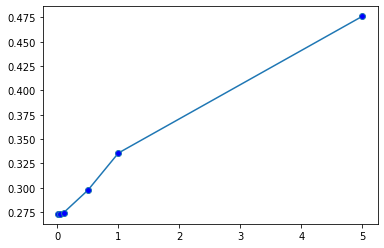

In [ ]:
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 

pred_test_rr= rr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr,squared=False)))

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
alpha_val=[0.01,0.05,0.1,0.5,1,5]
rmse_val=[]
for i in alpha_val:
    rr = Ridge(alpha=i)
    rr.fit(x_train, y_train) 
    pred_test_rr= rr.predict(x_test)
    rmse_val.append(np.sqrt(mean_squared_error(y_test,pred_test_rr,squared=False)))
    
plt.plot(alpha_val,rmse_val,marker='o', markerfacecolor='blue', markersize=6)
plt.show()

Alpha is the penalty term. So by changing the values of alpha, we are basically controlling the penalty term. Higher the values of alpha, bigger is the penalty and therefore the magnitude of coefficients are reduced. For alpha=0, we'll get the same coefficients as linear regression. For alpha=infinity, the coefficients will be zero. 

### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is a modification of linear regression in which the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).

Lasso regression optimizes the following:

Objective = RSS + α * (sum of absolute value of coefficients)

2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

In [ ]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`

0.2953502679031329
0.5017365334812042
0.6227440830823618
0.6313783559061928
0.6313783559061928
0.6313783559061928


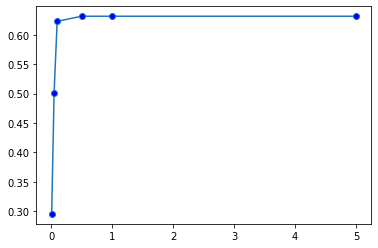

In [ ]:
from sklearn.linear_model import Lasso

alpha_val=[0.01,0.05,0.1,0.5,1,5]
rmse_val=[]
for i in alpha_val:
    model_lasso = Lasso(alpha=i)
    model_lasso.fit(x_train, y_train) 
    pred_test_lasso= model_lasso.predict(x_test)
    rmse_val.append(np.sqrt(mean_squared_error(y_test,pred_test_lasso,squared=False)))
    
plt.plot(alpha_val,rmse_val,marker='o', markerfacecolor='blue', markersize=6)
plt.show()


Alpha affect the results in a similar fashion to ridge regression. The slight difference lies in their objective formulas. In ridge regression, 'sum of square of coefficients' is impacted whereas in lasso regression 'sum of absolute value of coefficients' is impacted. 